#Tarea 6
##Metodos Computacionales
**Miguel Angel Rojas Aparicio**




# Punto 1: Cálculo Simbólico
En este ejercicio queremos usar Sympy para calcular las ecuaciones que definen a los métodos
explícitos de Adams-Bashforth para cualquier orden.

##Punto a

Programe una función de python llamada lagrange que reciba el número N de
puntos $\{ti, fi\}$ para $i = 0..., N −1$, y que entregue de regreso una expresión simbólica para
el polinomio de grado $N − 1$ que los interpola. Puede usar var para definir símbolos de
SymPy de forma programática y eval para convertir strings en nombres de objetos. Abajo
a la izquierda se muestra el output en algunos casos

In [30]:
#Importar el espacio interactivo de numpy y matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
#Importar la herramienta para cálculo simbólico de Sympy 
from sympy import *
#Mejorar el estilo de impresión
init_printing(use_unicode=True)

In [32]:
#Esta función permite realizar la construcción del polinomio que interpola los N puntos a trabajar de forma simbólica
def lagrange(N):
    #Crear la variable simbólica tiempo y step de avance
    var('t h')
    #Condicional para evitar generar errores con números en cero o negativos
    if N<=0:
        return "Ingrese un valor entero mayor a cero"
    else:
        #Variable de tipo string para agregar todos los términos
        acum=''
        #Ciclo que genera las nuevas variables simbólicas dependiendo del números de puntos N a trabajar
        for i in range(N):
            var('f%d t%d'%(i,i))
        
        #Ciclo para generar la construcción de cada uno de los términos del polinimio
        for j in range(N):
            term='+f%d'%j        #Variable string para almacenar las variables de cada uno de los términos 
            for k in range(N):
                if not(j==k):
                     term+='*(t-t%d)/(t%d-t%d)'%(k,j,k)
            #Acumulación de los términos
            acum+=term
        #Imprimir el polinomio
        return eval(acum)

#Resultado para 1 punto
lagrange(1)

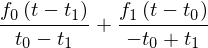

In [33]:
#Resultado para 2 puntos
lagrange(2)        

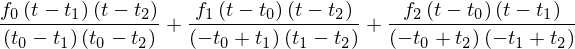

In [34]:
#Resultado para 3 puntos
lagrange(3)

##Punto b

Ahora, en el contexto de los métodos multistep de Adams-Bashforth defina una
función llamada adams que reciba el orden m a considerar y de regreso entregue el incremento
correspondiente. Para ello tome $ti = tn − i ∗ h$ y $fi = f(ti)$ siendo h el timestep.
Para ello debe utilizar la función definida en el anterior literal, y utilizar integrate y
simplify de SymPy.

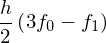

In [35]:
#Función que permite evaluar el método de  Adams-Bashforth dependiendo del grado m que se ingrese

def adams(m):
    #Crear la variable simbólica tiempo y step de avance
    var('t h')
    
    #Ciclo para generar las variables simbólicas necesarias para evaluar el método
    for i in range(m):
        var('f%d t%d'%(i,i))
    
    #Llamado de la función anterior para generar el polinomio a evaluar dependiendo del grado ingresado
    poly=lagrange(m)
    
    #Ciclo para reemplazar algunas variables del tiempo por sus correspondientes equivalencias en términos del step a utilizar
    for i in range(m-1):
        a=m-1-i
        poly=poly.subs('t%d'%a,'t%d-%d*h'%(0,a))
   
    #Límite superior de la integral
    a=eval('t%d'%(0))
    #Límite inferior de la integral
    b=eval('t%d +h'%(0))
    #Simplificar e integrar el polinomio recibido
    return simplify(integrate(poly,(t,a,b)))

#Resultado para el grado 2
adams(2)

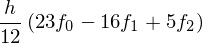

In [36]:
#Resultado para el grado 3
adams(3)

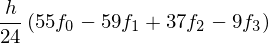

In [37]:
#Resultado para el grado 4
adams(4)

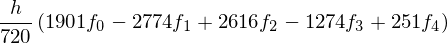

In [38]:
#Resultado para el grado 5
adams(5)

#Punto 2: Potencial Gravitacional

En este ejercicio queremos encontrar la solución a la ecuación de Poisson para el caso del
potencial gravitacional y usar el resultado para resolver la ecuaci´on de movimiento de una
pequeña partícula. Para poder hacerlo debe modificar lo visto para la ecuación de Poisson en
el caso electromagnético para el caso gravitacional.

##Punto a

Encuentre el potencial gravitacional de un cubo de densidad $400\frac{Kg}{m^3}$ y lado 270. m usando
el método de relajación. Resuelva la ecuación de Poisson para el potencial en un cubo de
3.00 km de lado usando una cuadrícula en cada dirección de 30. m de lado. Use condiciones
de frontera de Dirichlet tomando φ = 0 en la frontera y tome como ansatz el potencial de
una masa puntual. Use un sistema de coordenadas con el centro del cubo en el origen y los
ejes xyz perpendiculares a las caras. Al final haga una gráfica de densidad del potencial
en el plano yz con líneas equipotenciales superpuestas.

$ \frac{\partial^2\phi}{\partial x^2} + \frac{\partial^2\phi}{\partial y^2}+ \frac{\partial^2\phi}{\partial z^2}=-4\pi G\rho$



$ \phi_{i,j,k}=\frac{1}{6}(\phi_{i+1,j,k} + \phi_{i-1,j,k} +\phi_{i,j+1,k}+\phi_{i,j-1,k}+\phi_{i,j,k+1}+\phi_{i,j,k-1}-4\pi G\rho h^2) $

Para una masa puntual
$ \phi = -\frac{Gm}{r}$

In [9]:
#Importar el espacio interactivo de numpy y matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
#Declaración de constantes 

G=6.67384*10**-11*(100**3)    #Constante Gravitacional  (Kg*cm/s^2)*cm^2/Kg^2
rho=400./100**3               #Densidad Kg/cm^3
h=30*100.                     #Tamaño del lado del cubo minimo a considerar en cm
Vol=h**3                      #Volumen del cubo minimo a considerar cm^3  
Masa=rho*Vol                  #Masa del volumen en Kg
lado=3000.                    #Medida del cubo grande en el cual se va a analizar el potencial gravitacional

#Establecer el sistema de coordenadas en el centro del cubo
xmin=-lado/2.
xmax=lado/2.
ymin=-lado/2.
ymax=lado/2.
zmin=-lado/2.
zmax=lado/2.
N=101                         #Número de casillas a generar por lado en el cubo
xcoords=linspace(xmin,xmax,N) #Generar las divisiones y las posiciones centrales de las casillas 
ycoords=linspace(ymin,ymax,N)
zcoords=linspace(zmin,zmax,N)

xcoords[N/2]=(xcoords[N/2-1]) #Eliminar el valor en cero y reemplazar por un valor cercano
ycoords[N/2]=(ycoords[N/2-1])
zcoords[N/2]=(zcoords[N/2-1])

#Generar arreglos para trabajar con slice notation
cube=np.zeros((N,N,N))        #Cubo grande o espacio a trabajar de 3km de lado que contiene los potenciales gravitacionales
x=range(0,N)                  #Generación de las posiciones a recorrer en el cubo
y=range(0,N)
z=range(0,N)
xx,yy,zz = meshgrid(x,y,z)    #Todas las posibles combinaciones de las posiciones en x,y,z

#Inicialización de los valores para el potencial gravitacional en base a una masa puntal
cube[xx,yy,zz]=-Masa*G/(sqrt((xcoords[xx])**2+(ycoords[yy])**2+(zcoords[zz])**2)*100.)

cube[0,:,:]=0                #Condiciones de frontera
cube[:,0,:]=0
cube[:,:,0]=0
cube[-1,:,:]=0
cube[:,-1,:]=0
cube[:,:,-1]=0

#Construcción de la masa central
density=zeros((N,N,N))       #Arreglo cúbico que contendrá los valores de la densidad y define el cubo de 270m de lado
density[ N/2-4:N/2+5 , N/2-4:N/2+5 , N/2-4:N/2+5 ]=rho 

In [11]:
#Método de relajación
lista=[cube]                 #Lista que contendrá los arreglos generados en cada una de las iteraciones 
l=0                          #Inicializar variable de iteración
x=range(1,N-1)               #Eliminar valores en la frontera
y=range(1,N-1)
z=range(1,N-1)
xx,yy,zz = meshgrid(x,y,z)   #Generar malla a recorrer en los arreglos 

while l<5000:                #Ciclo de 5000 iteraciones. ATENCIÓN: Puede Tardar un Poco
    
    #Cálculo de los valores de cada una de las casillas teniendo en cuenta el cubo anterior y el término adicional en función de la densidad
    cube[xx,yy,zz]=1./6.*(lista[l][xx+1,yy,zz] + lista[l][xx-1,yy,zz] +
                          lista[l][xx,yy+1,zz] + lista[l][xx,yy-1,zz] + 
                          lista[l][xx,yy,zz+1] + lista[l][xx,yy,zz-1] 
                          - 4*pi*G*density[xx,yy,zz]*(h)**2)
    #Condiciones de frontera 
    cube[0,:,:]=0
    cube[:,0,:]=0
    cube[:,:,0]=0
    cube[-1,:,:]=0
    cube[:,-1,:]=0
    cube[:,:,-1]=0
    lista.append(cube)
    l+=1
   


<a list of 5 text.Text objects>

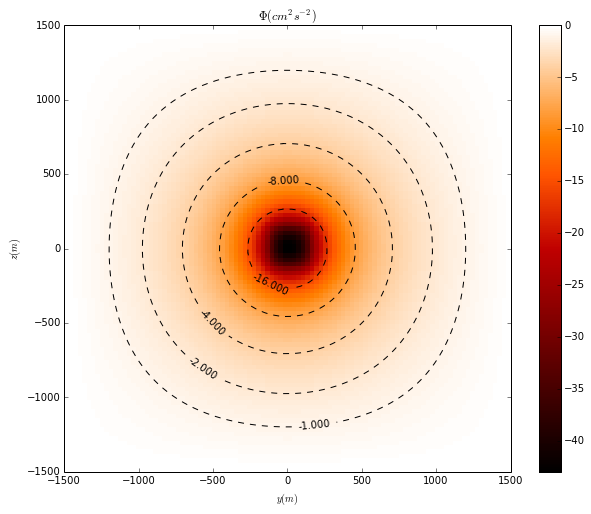

In [17]:
#Visualización de una tajada del cubo: el plano yz

fig=figure(figsize=(10,8))                              #Inicialización de la figura
pcolor(ycoords,zcoords,cube[100/2.],cmap='gist_heat')   #Graficar los valores del potencial gravitacional obtenido en la iteración anterior
title('$\Phi (cm^{2}s^{-2})$')                          #Título
xlabel('$y (m)$')                                       #Ejes 
ylabel('$z (m)$')
colorbar()                                              #Barra de colores 
C=contour(ycoords,zcoords,cube[100/2.],                 #Generación de los contornos
          levels=[-1,-2,-4,-8,-16],colors = 'k') 
clabel(C)                                               #Poner etiquetas a los contornos 


##Punto b
También haga una gráfica del potencial a lo largo del eje z y compare con lo que
se obtiene de segmentar el cubo en $9^3$ masas puntuales y sumar los potenciales correspondientes.

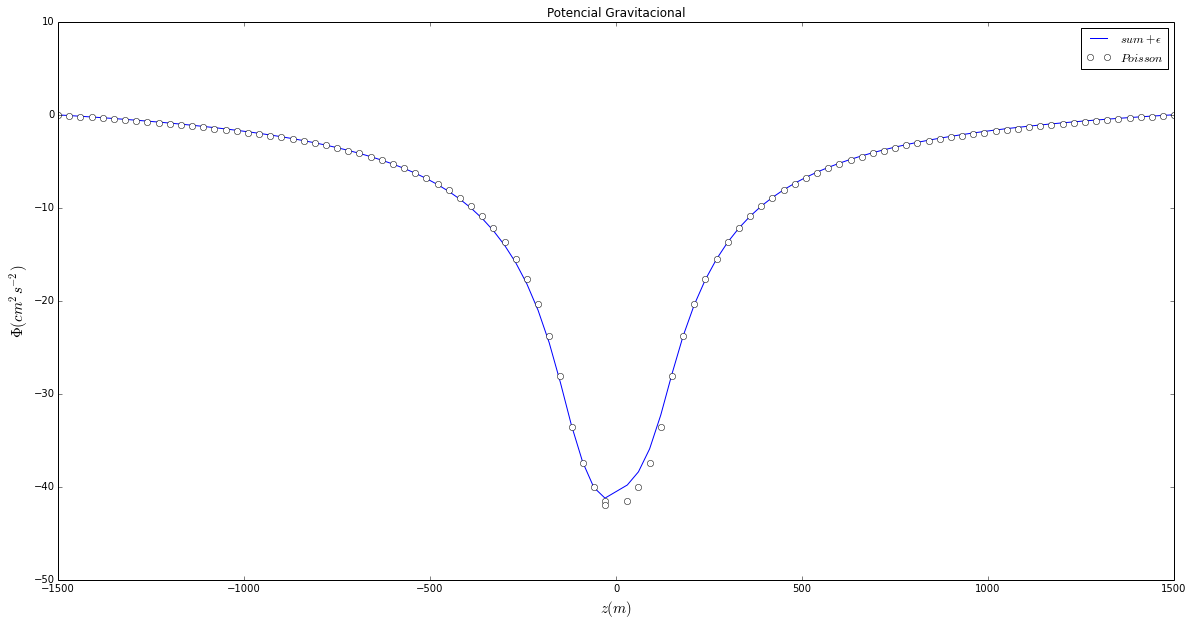

In [21]:
#Inicializar los valores para las posiciones de la masa
x=range(0,9)                       #Nueve cubos de largo, 9**3 en total
y=range(0,9)
z=range(0,9)
xx,yy,zz = meshgrid(x,y,z)         #Posibles combinaciones para realizar los recorridos de las matrices 
xxx=xx+N/2-4                       #Posiciones para trabajar con las coordenadas del cubo generado en el anterior literal
yyy=yy+N/2-4
zzz=zz+N/2-4

#Función que permite calcular la suma de los potenciales desde cada una de las 9**3 masas en valores vec de la coordenada z
def fun(vec):
    a=zeros((9,9,9))               #Inicialización de la matriz de ceros para almacenar los valores a calcular de los potenciales
    #Cálculo de cada uno de los potenciales y su seguido almacenamiento
    a[xx,yy,zz]=-G*(Masa)/(sqrt(xcoords[xxx]**2+ycoords[yyy]**2+(zcoords[zzz]-vec)**2)*100.)
    
    return sum(a)                  #Retornar la suma de estos potenciales 

#Visualización
vec=vectorize(fun)                 #Vectorización de la función definida anteriormente
a=vec(zcoords)                     #Almacenamiento de los valores obtenidos de la función al ingresar los valores del eje z
fig=figure(figsize(20,10))         #Generación de la figura
plot(zcoords,a+3.5,                #Valores para la suma de los potenciales 
     label="$sum + \epsilon$")                
plot(zcoords,cube[102/2.,102/2.,:] #Valores obtenidos por la solución de la fórmula de Poisson
     ,'o',c='w', label="$Poisson$")
title('Potencial Gravitacional')   #Titulo
xlabel('$z(m)$',fontsize=15)       #MArcas Eje x, y
ylabel('$\Phi(cm^{2}s^{-2})$',fontsize=15)
xlim(-1500,1500)                   #Fijar límite en x
legend()                           #Visualizar leyenda

##Punto c
Luego calcule el campo gravitacional a lo largo del mismo eje haciendo derivadas
numéricas

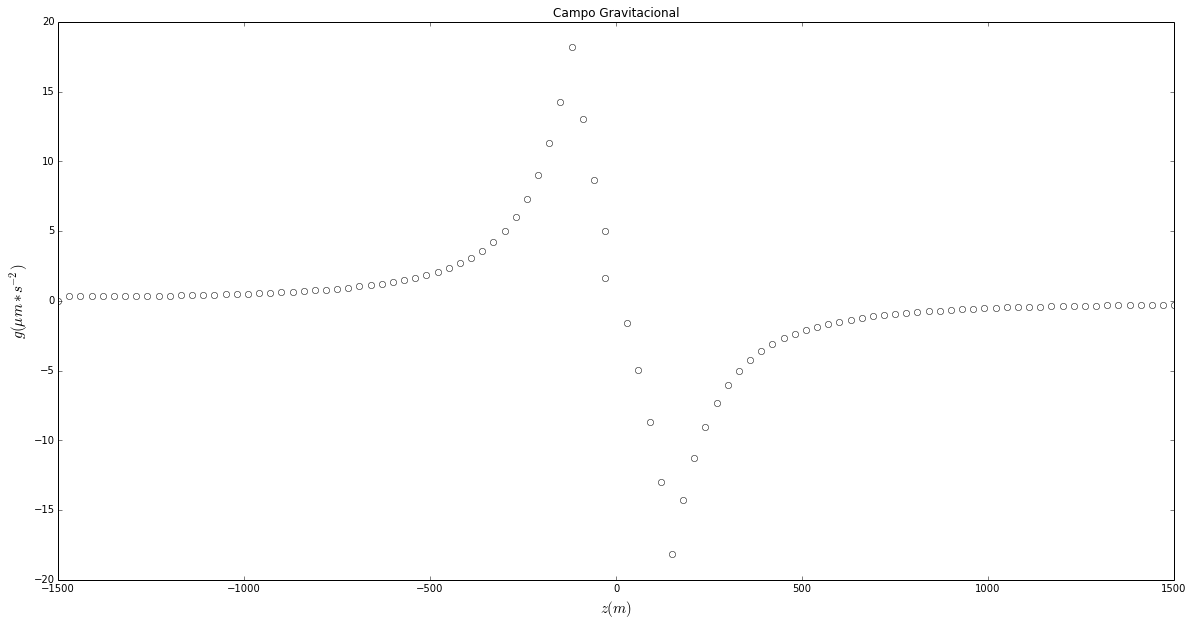

In [24]:
#Cálculo de la derivada numérica
derivada=(roll(cube[102/2.,102/2.,:],1)-cube[102/2.,102/2.,:])/(30)
fig=figure(figsize(20,10))
plot(zcoords,derivada*100,'o',c='w')
title('Campo Gravitacional')
xlabel('$z (m)$',fontsize=15)
ylabel('$g (\mu m*s^{-2})$',fontsize=15)


##Punto d
Finalmente encuentre el tiempo que le tomaría a una partícula de masa pequeña
en chocar contra el cubo si parte del reposo sobre el eje z y a una distancia de 500 m de
la cara más próxima. Para ello resuelva la ecuación de movimiento usando lo encontrado
para el campo gravitacional en el anterior literal.

$$x=x_0+v_0t+\frac{a_0t^2}{2}+\frac{da}{dt}|_0\frac{t^3}{3}+\frac{d^2a}{dt^2}|_0\frac{t^4}{4}$$



$$t=\sqrt{(x-x_0-v_0t-\frac{da}{dt}|_0\frac{t^3}{3}-\frac{d^2a}{dt^2}|_0\frac{t^4}{4})\frac{2}{a_0}}$$

In [28]:
#Interpolar los datos obtenidos en la derivada numérica
from scipy import interpolate
interpol= interpolate.interp1d(zcoords,derivada,kind='linear')

#Constantes 
x=xcoords[N/2+5]+15           #Posición de choque 
x_0=500+xcoords[N/2+5]+15     #Posición inicial
v_0=0                         #Velocidad inicial
a_0=interpol(x_0)       #aceleración inicial
 #Primera derivada de la aceleración
da_0=(interpol(x_0)-interpol(x_0+1))   
#Segunda derivada de la aceleración
d2a_0=(interpol(x_0-1)-2*interpol(x_0)+interpol(x_0+1)) 
#Variable para guardar Diferencias
dif=10
time=10
while dif>0.01:
    mem=time
    
    time=sqrt((x-x_0-v_0*time-da_0*time**3/3.-d2a_0*time**4/12.)*2./a_0)
    dif=abs(mem-time)
print "El tiempo necesario es: ", time, "s"

El tiempo necesario es:  236.918907598 s
